# **TikTok Project**
**Introduction**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

**Exploratory data analysis**

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

# **Visualize a story in Tableau and Python**

### **Imports, links, and loading**


In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [5]:
!pwd
!ls

/kaggle/working


In [7]:
# Load dataset into dataframe
data = pd.read_csv("/kaggle/input/tiktok-dataset/tiktok_dataset.csv")

### **Data exploration and cleaning**

In [8]:
# Display and examine the first few rows of the dataframe
data.head()



,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [9]:
data.size

232584

In [10]:
# Get the shape of the data
data.shape

(19382, 12)

Get basic information about the data, using `.info()`.

In [11]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [12]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Build visualizations**

#### **video_duration_sec**

Examine the spread of values in the `video_duration_sec` column.

<Axes: title={'center': 'video_duration_sec'}, xlabel='video_duration_sec'>

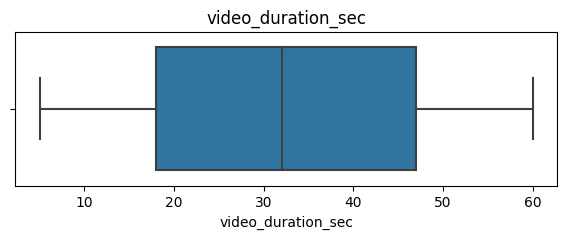

In [14]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(7,2))
plt.title('video_duration_sec')
sns.boxplot(data=None, x=data["video_duration_sec"], fliersize = 1)


Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video Duration Sec histogram')

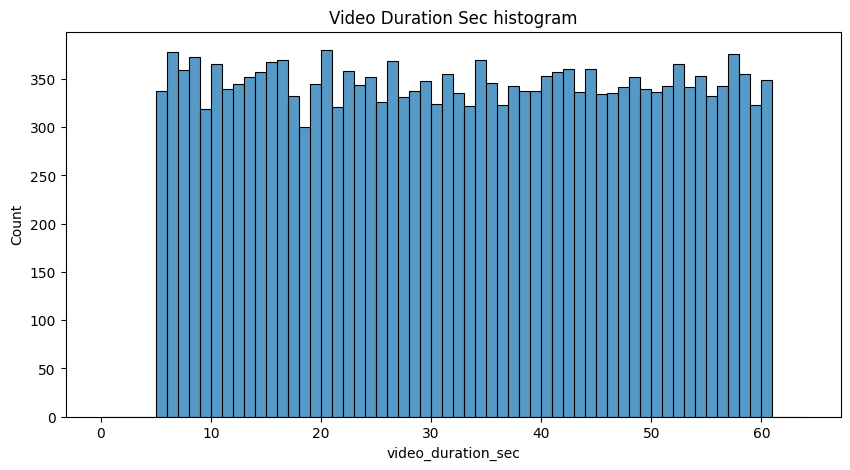

In [15]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data['video_duration_sec'], bins=range(0,65,1))
plt.title('Video Duration Sec histogram')

#### **video_view_count**

Examine the spread of values in the `video_view_count` column.

<Axes: title={'center': 'video_view_count'}, xlabel='video_view_count'>

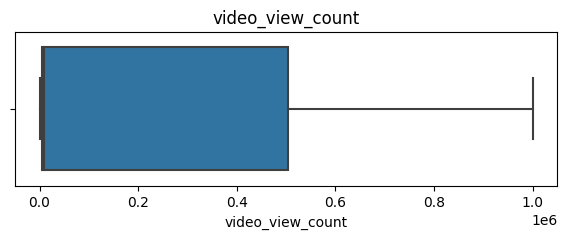

In [16]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(7,2))
plt.title('video_view_count')
sns.boxplot(data=None, x=data["video_view_count"], fliersize = 1)

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video View Count histogram')

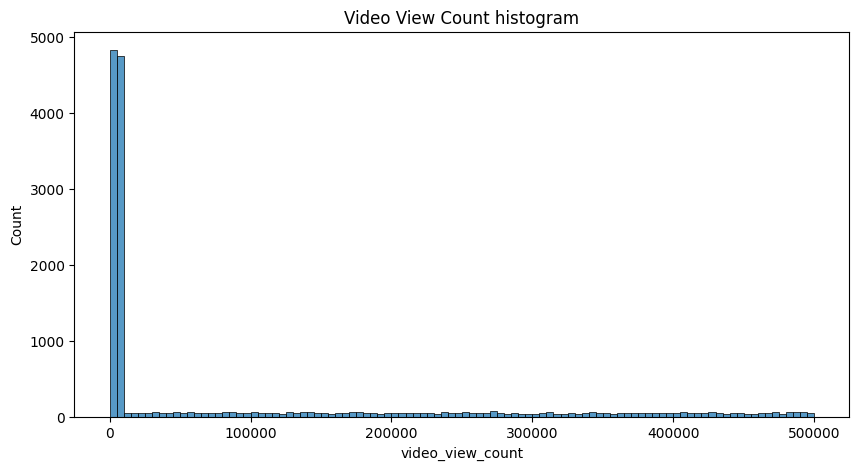

In [17]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data['video_view_count'], bins=range(0,505000,5000))
plt.title('Video View Count histogram')

**Conclusion:** The video view count ranging from 0 to 10,000 shows a significant difference compared to views over 10,000. From 10,000 and above, the numbers are mostly quite consistent with each other. The distribution is very skewed to the right.

#### **video_like_count**
Examine the spread of values in the `video_like_count` column.

<Axes: title={'center': 'video_like_count'}, xlabel='video_like_count'>

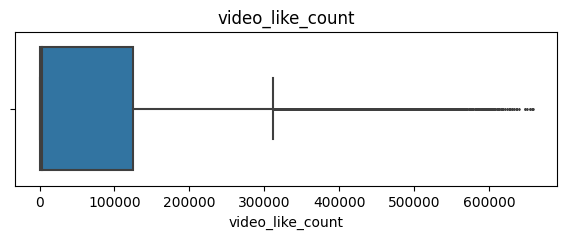

In [18]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(7,2))
plt.title('video_like_count')
sns.boxplot(data=None, x=data["video_like_count"],fliersize = 1)


Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video Like Count histogram')

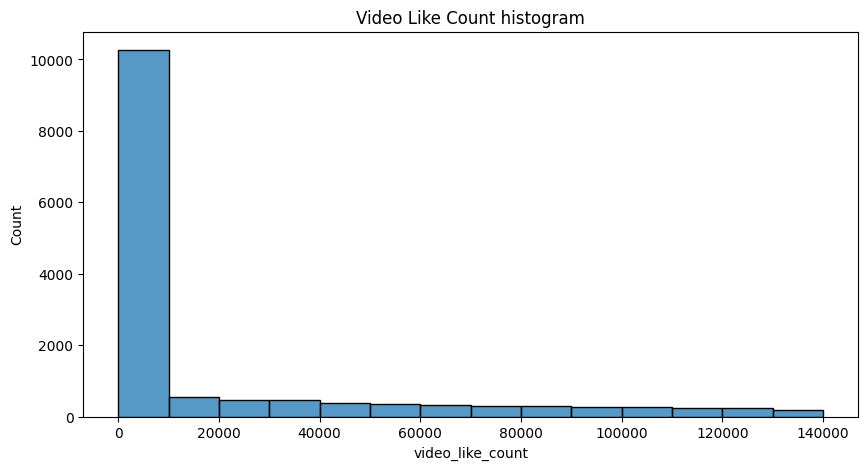

In [19]:
# Create a histogram
plt.figure(figsize=(10,5))
sns.histplot(data['video_like_count'], bins=range(0,150000,10000))
plt.title('Video Like Count histogram')

**Conclusion:**  The video like count ranging from 0 to 10,000 shows a significant difference compared to views over 10,000. From 10,000 and above, the number of views and likes gradually decreases. The distribution is very skewed to the right.

#### **video_comment_count**
Examine the spread of values in the `video_comment_count` column.

<Axes: title={'center': 'video_comment_count'}, xlabel='video_comment_count'>

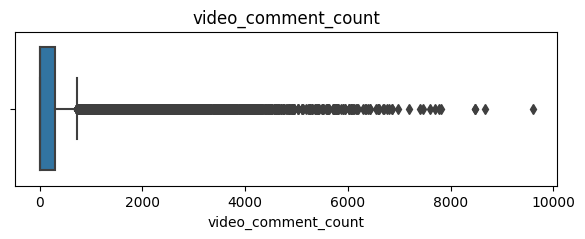

In [20]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(7,2))
plt.title('video_comment_count')
sns.boxplot(
    data=None, x=data["video_comment_count"],
   fliersize = 5
)



Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

**Conclusion:** The video comment count ranging from 0 to 400 shows a significant difference compared to views over 400. From 400 and above, the number of comments gradually decreases.The distribution is very skewed to the right.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video Comment Count histogram')

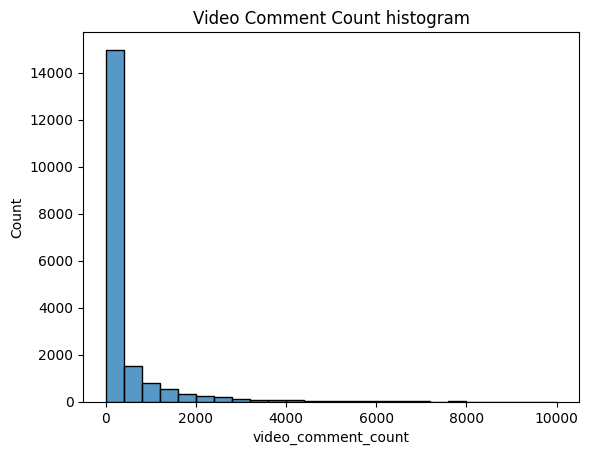

In [27]:
# Create a histogram

ax = sns.histplot(data['video_comment_count'], bins=range(0,(1*10**4+1),20**2))
# labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
# ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video Comment Count histogram')


#### **video_share_count**
Examine the spread of values in the `video_share_count` column.

<Axes: title={'center': 'video_share_count'}, xlabel='video_share_count'>

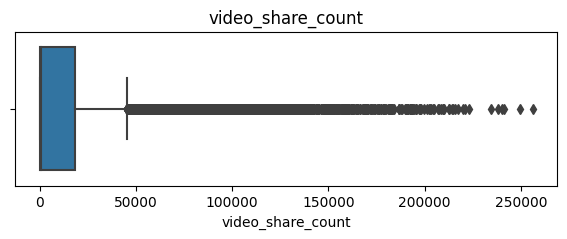

In [28]:
# Create a boxplot to visualize distribution of `video_share_count`
plt.figure(figsize=(7,2))
plt.title('video_share_count')
sns.boxplot(
    data=None, x=data["video_share_count"],
   fliersize = 5
)


*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video Like Count histogram')

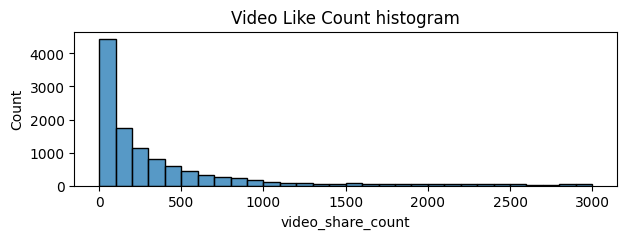

In [29]:
# Create a histogram
plt.figure(figsize=(7,2))

ax = sns.histplot(data['video_share_count'], bins=range(0,(3*10**3+1),10**2))
plt.title('Video Like Count histogram')

#### **video_download_count**

Examine the spread of values in the `video_download_count` column.

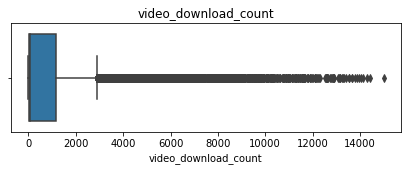

In [42]:
# Create a boxplot to visualize distribution of `video_download_count`
plt.figure(figsize=(7,2))
plt.title('video_download_count')
sns.boxplot(data=None, x=data["video_download_count"], fliersize = 5)


Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Download Count histogram')

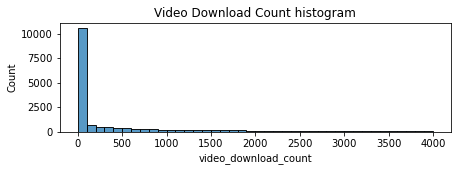

In [43]:
# Create a histogram
plt.figure(figsize=(7,2))
ax = sns.histplot(data['video_download_count'], bins=range(0,(4*10**3+1),10**2))
plt.title('Video Download Count histogram')

#### **Claim status by verification status**

Create a histogram with four bars: one for each combination of claim status and verification status.

Text(0.5, 1.0, 'Tip amount by vendor histogram')

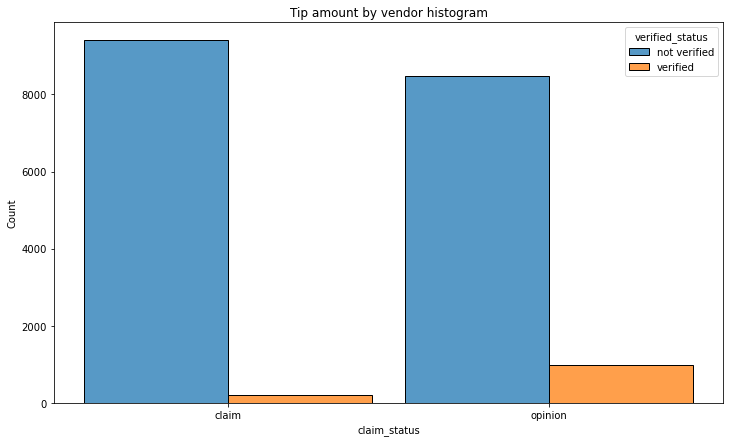

In [49]:
# Create a histogram
plt.figure(figsize=(12,7))

ax = sns.histplot(data=data, x="claim_status", 
             hue="verified_status", 
             multiple="dodge",
            shrink=0.9)
# ax.set_xticks(range(10,21,1))
# ax.set_xticklabels(range(10,21,1))
plt.title('Claim status by verification status')

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

**Answer:**: the number of verified users was much smaller than unverified. The verified users were much more likely to post options

#### **Claim status by author ban status**
Examine the count of each claim status for each author ban status.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Claim status by author ban status')

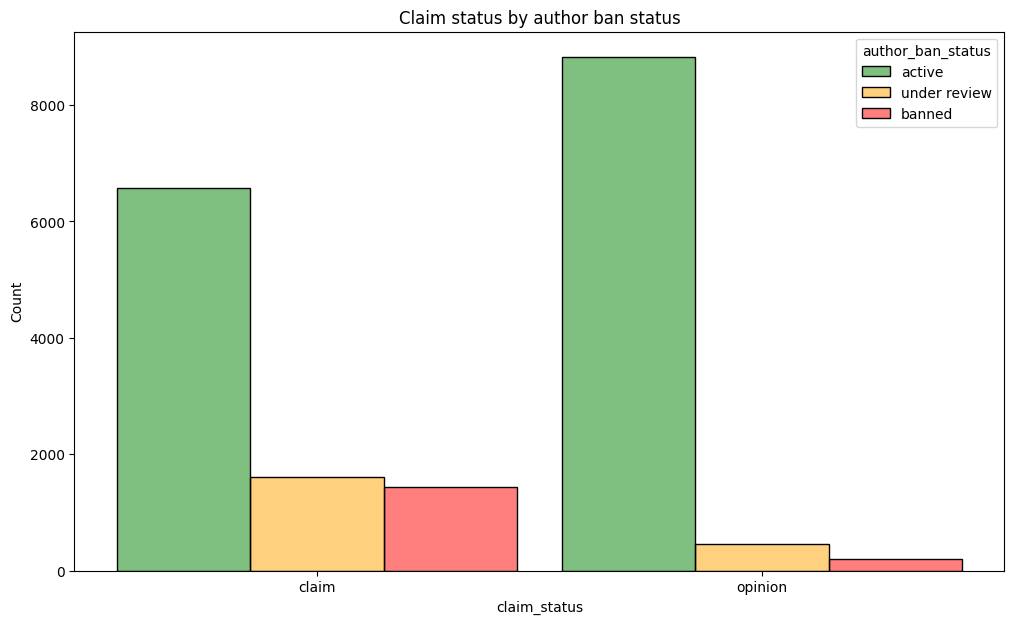

In [30]:
# data["author_ban_status"].value_counts()
# Create a histogram

plt.figure(figsize=(12,7))

ax = sns.histplot(data=data, x="claim_status", 
             hue="author_ban_status", 
             multiple="dodge",
            hue_order=["active", "under review", "banned"],     
            shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)

plt.title('Claim status by author ban status')

**Conclusion:** For both claims and opinions, there are many more active authors than banned authors or authors under review; however, the proportion of active authors is far greater for opinion videos than for claim videos. Again, it seems that authors who post claim videos are more likely to come under review and/or get banned.

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Mean tip amount by passenger count')

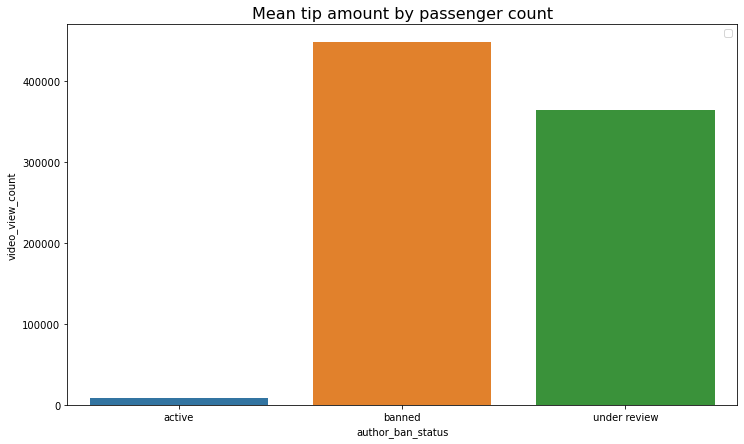

In [8]:
# Create a bar plot
Median_view_counts_by_ban_status = data.groupby(by="author_ban_status").median()
Median_view_counts_by_ban_status
# data = df_tips_mean_by_passenger_count.tail(-1)

plt.figure(figsize=(12,7))
ax = sns.barplot(x=Median_view_counts_by_ban_status.index, y=Median_view_counts_by_ban_status["video_view_count"])
ax.legend()

plt.title('Mean tip amount by passenger count', fontsize=16)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Mean tip amount by passenger count')

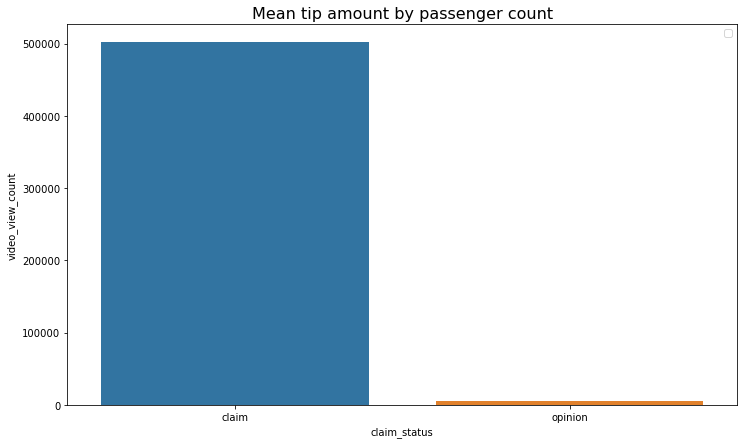

In [3]:
# Calculate the median view count for claim status.

Median_view_counts_by_claim_status = data.groupby(by="claim_status").median()
Median_view_counts_by_claim_status


plt.figure(figsize=(12,7))
ax = sns.barplot(x=Median_view_counts_by_claim_status.index, y=Median_view_counts_by_claim_status["video_view_count"])
ax.legend()

plt.title('Mean tip amount by passenger count', fontsize=16)

In [43]:

x = data["video_view_count"].to_numpy()
x[~np.isnan(x)]

array([3.43296e+05, 1.40877e+05, 9.02185e+05, ..., 7.34000e+02,
       3.39400e+03, 5.03400e+03])

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

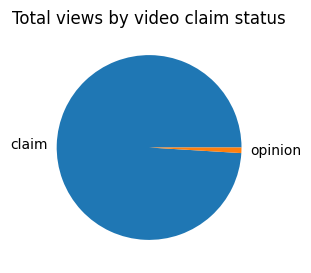

In [31]:
# Create a pie graph

Sum_view_counts_by_claim_status = data.groupby(by="claim_status").sum()

Sum_view_counts_by_claim_status

fig = plt.figure(figsize=(3,3))
plt.pie(Sum_view_counts_by_claim_status["video_view_count"], labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

**Question:** What do you notice about the overall view count for claim status?

**Answer:**  The overall view count is dominated by claim videos even though there are roughly the same number of each video in the dataset.

### **Determine outliers**

In [49]:
### YOUR CODE HERE ###

def caculate_iqr(df_1col):
    q1 = df_1col.quantile(0.25)
    q3 = df_1col.quantile(0.75)
   
    return q3-q1

def caculate_median(df_1col):
#     print("median: ", df_1col.median())

    return df_1col.median()

def cacualate_outlier_thresh(median, iqr):
#     print("Thresh: ", median + 1.5 * iqr)
    return median + 1.5 * iqr

def count_outliers(df_1col, thresh):
    mask = df_1col > thresh
#     print("mask: ", mask)
    return df_1col[mask].size

count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for col in count_cols:
    iqr = caculate_iqr(data[col])
    median = caculate_median(data[col])
    outlier_thresh =  cacualate_outlier_thresh(median, iqr)
    print(f"Number of outliers {col}: ", count_outliers(data[col], outlier_thresh))


Number of outliers video_view_count:  2343

Number of outliers video_like_count:  3468

Number of outliers video_share_count:  3732

Number of outliers video_download_count:  3733

Number of outliers video_comment_count:  3882


#### **Scatterplot**

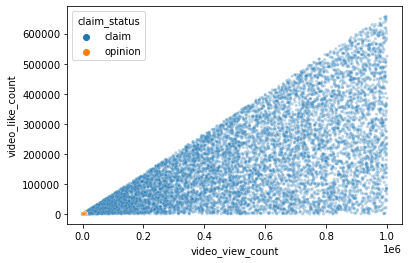

In [50]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

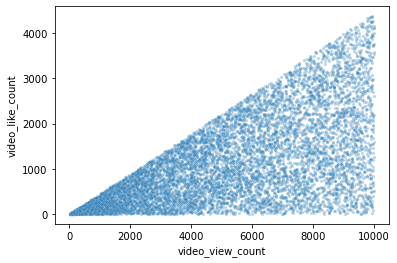

In [52]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only

option = data[data["claim_status"] == "opinion"]
sns.scatterplot(x=option["video_view_count"], y=option["video_like_count"]
                , s=10, alpha=.3)